In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
images = []
ages = []
genders = []
#I will try to attach the dataset but its difficult to upload due to its larger size
# so you can use the dataset from https://www.kaggle.com/datasets/jangedoo/utkface-new
for i in os.listdir('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/Image/crop_part1/')[0:8000]:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    images.append(Image.open('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/Image/crop_part1/' + i))

In [3]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,100,1
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,100,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,101,1
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
...,...,...,...
7995,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1
7996,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1
7997,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1
7998,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1


array([100, 100, 101, ...,   9,   9,   9], dtype=int64)

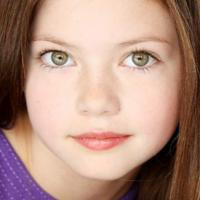

10 1


In [4]:
display(df['Images'][100])

print(df['Ages'][100], df['Genders'][100])

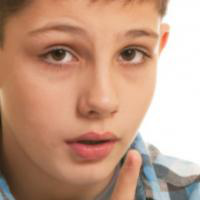

10 0


In [5]:
display(df['Images'][11])
print(df['Ages'][11], df['Genders'][11])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

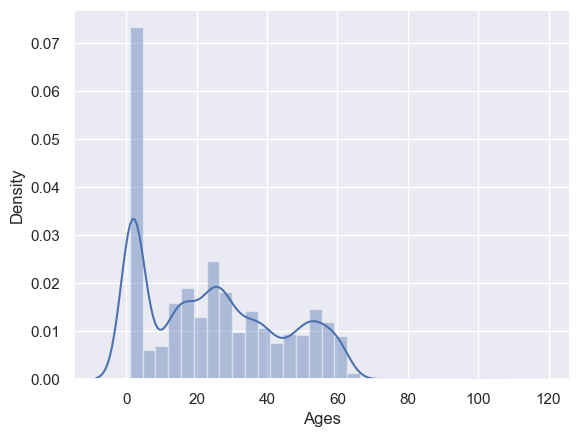

In [6]:
sns.set_theme()
sns.distplot(df['Ages'],kde=True, bins=30)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

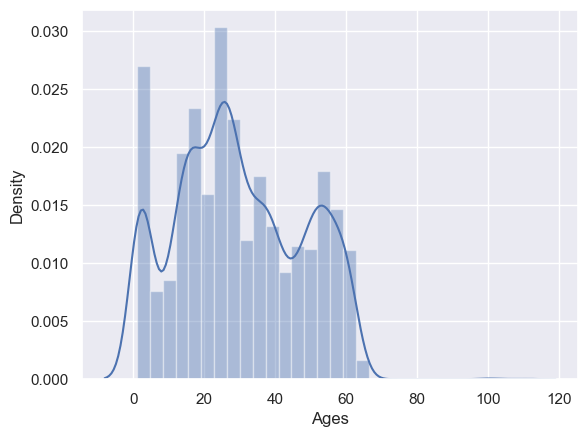

In [7]:
under4s = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4s.append(df.iloc[i])
under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, under4s], ignore_index = True)
sns.distplot(df['Ages'],kde=True, bins=30)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

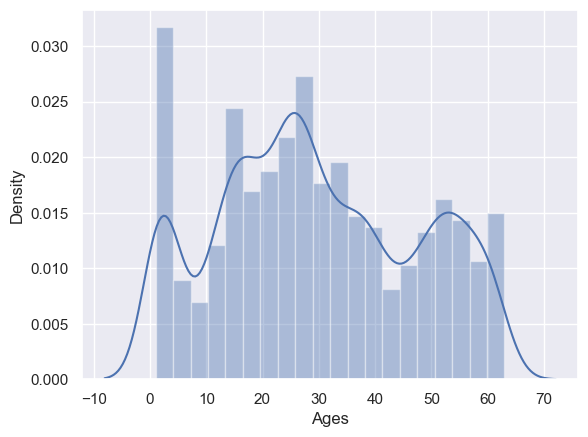

In [8]:
df = df[df['Ages'] < 80]
sns.distplot(df['Ages'],kde=True, bins=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genders', ylabel='count'>

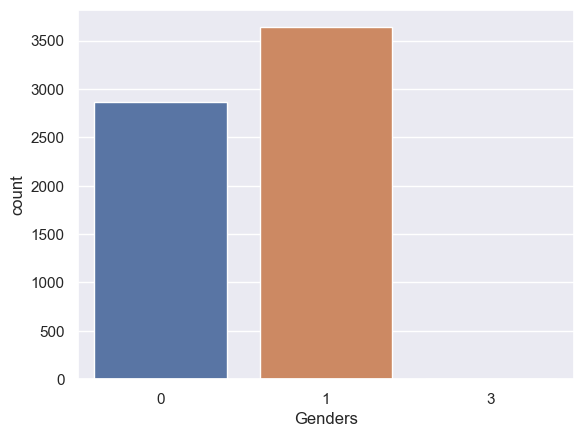

In [9]:
sns.countplot(df['Genders'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genders', ylabel='count'>

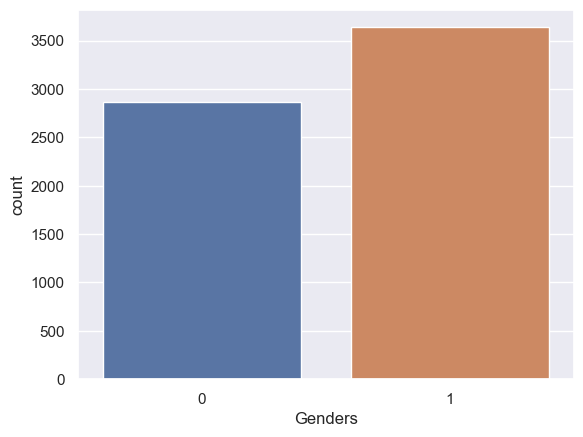

In [10]:
df = df[df['Genders'] != 3]
sns.countplot(df['Genders'])

In [11]:
x = []
y = []

for i in range(len(df)):
    df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)
    ar = np.asarray(df['Images'].iloc[i])
    x.append(ar)
    agegen = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
    y.append(agegen)
x = np.array(x)

C:\Users\hm\AppData\Local\Temp\ipykernel_94144\2993096863.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)
C:\Users\hm\AppData\Local\Temp\ipykernel_94144\2993096863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)


In [12]:
y_age = df['Ages']
y_gender = df['Genders']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)

x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)

In [13]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='relu'))

agemodel.compile(loss='mean_squared_error',
             optimizer=optimizers.Adam(lr=0.0001))

genmodel = Sequential()
genmodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(64, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(128, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Flatten())
genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))
genmodel.add(Dense(1, activation='sigmoid'))

genmodel.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
#Normalization
#from keras.callbacks import ModelCheckpoint
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
#mcp_save = ModelCheckpoint('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/age_predictor.h5', save_best_only=True, monitor='val_loss', mode='min')
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)


history1 = agemodel.fit(train1, epochs=2, shuffle=True, validation_data=test1)

agemodel.save('age_model_2epochs.h5') # creates a HDF5 file 'my_model.h5'  

Epoch 1/2
163/163 [==============================] - 1628s 10s/step - loss: 417.1767 - val_loss: 327.3448
Epoch 2/2
163/163 [==============================] - 2261s 14s/step - loss: 351.0984 - val_loss: 302.2509


In [21]:
agemodel.save('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/age_model_2epochs.h5')

In [22]:
model_json =genmodel.to_json()
with open("C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/Ages_Model.json", "w") as json_file:
    json_file.write(model_json)



In [61]:
from keras.models import load_model
agemodel = load_model('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/age_model_2epochs.h5', compile=False) 
 
 # deletes the existing model  
 
# returns a compiled model  
# identical to the previous one  


In [62]:
print(agemodel.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 128)     

In [77]:

#agemodel = load_model('my_model.h5')


In [35]:
#from keras.callbacks import ModelCheckpoint
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
#mcp_save = ModelCheckpoint('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/gender_predictor.h5', save_best_only=True, monitor='val_loss', mode='min')
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=64)

test2 = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=64)

history2 = genmodel.fit(train2, epochs=2, shuffle=True, validation_data=test2)

Epoch 1/2
82/82 [==============================] - 1219s 15s/step - loss: 0.6361 - accuracy: 0.6412 - val_loss: 0.5727 - val_accuracy: 0.6979
Epoch 2/2
82/82 [==============================] - 1256s 15s/step - loss: 0.5755 - accuracy: 0.7189 - val_loss: 0.5473 - val_accuracy: 0.7256


In [63]:
genmodel.save('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/gender_model_2epochs.h5')

In [37]:
model_json =genmodel.to_json()
with open("C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/Genmodel.json", "w") as json_file:
    json_file.write(model_json)

In [72]:
from keras.models import load_model
genmodel = load_model('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/gender_model_2epochs.h5', compile=False) 

In [73]:
print(genmodel.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 23, 23, 128)     

In [70]:
from tensorflow.keras.models import model_from_json
json_file = open('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/Age_Model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
agemodel = model_from_json(loaded_model_json)

In [68]:
from tensorflow.keras.models import model_from_json
json_file = open('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/Genmodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
genmodel = model_from_json(loaded_model_json)

In [76]:
print(genmodel.summary()) 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 23, 23, 128)     

77/77 [==============================] - 346s 5s/step
Accuracy =  0.5558282208588957


<AxesSubplot:>

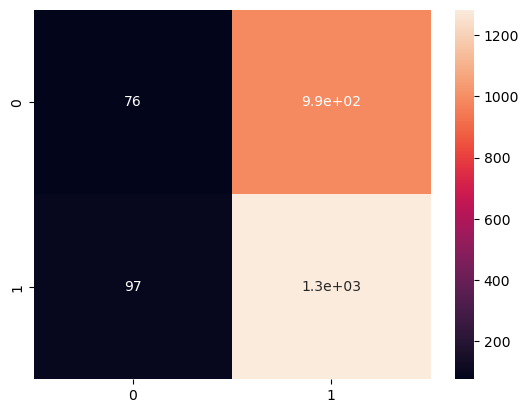

In [22]:
from keras.models import load_model
#Test the model
 #my_model= load_model('gender_model_5epochs.h5', compile=False)
my_model = load_model('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/age_model_10epochs.h5', compile=False)


predictions = my_model.predict(x_test_gender)
y_pred = (predictions>= 0.5).astype(int)[:,0]

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test_gender, y_pred))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test_gender, y_pred)  
sns.heatmap(cm, annot=True)

77/77 [==============================] - 138s 2s/step
Accuracy =  0.7730061349693251


<AxesSubplot:>

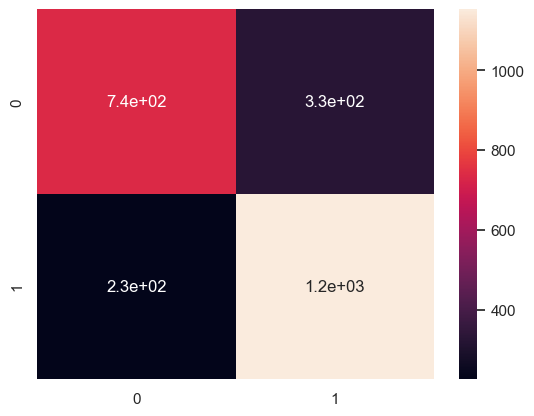

In [40]:
from keras.models import load_model
#Test the model
 #my_model= load_model('gender_model_5epochs.h5', compile=False)
my_model = load_model('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/gender_model_11epochs.h5', compile=False)


predictions = my_model.predict(x_test_gender)
y_pred = (predictions>= 0.5).astype(int)[:,0]

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test_gender, y_pred))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test_gender, y_pred)  
sns.heatmap(cm, annot=True)

In [35]:


# Test input image from us
from keras.models import load_model
#Test the model
agemodel = load_model('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/age_model_2epochs.h5', compile=False)
genmodel = load_model('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/gender_model_11epochs.h5', compile=False)

def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200,200), Image.ANTIALIAS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)
    
    age = agemodel.predict(ar)
    gender = np.round(genmodel.predict(ar))
    if gender == 0:
        gender = 'male'
    elif gender == 1:
        gender = 'female'
        
    print('Age:', int(age), '\n Gender:', gender)
   # print('Age:', int(age))
   # return im.resize((300,300), Image.ANTIALIAS)
    return im.resize((300,300))

C:\Users\hm\AppData\Local\Temp\ipykernel_44528\1570052523.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((200,200), Image.ANTIALIAS)


1/1 [==============================] - 3s 3s/step
Age: 18 
 Gender: female


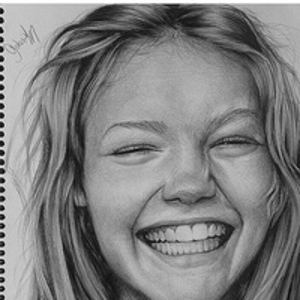

In [24]:
process_and_predict('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Pictures/Screenshot_2020-10-23-10-28-01.jpg')

C:\Users\hm\AppData\Local\Temp\ipykernel_14224\1570052523.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((200,200), Image.ANTIALIAS)


1/1 [==============================] - 0s 217ms/step
Age: 24 
 Gender: male


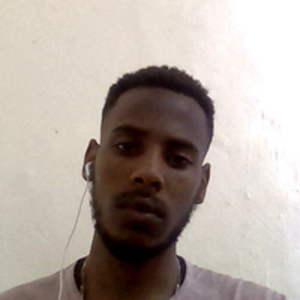

In [79]:
process_and_predict('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Pictures/WIN_20220524_13_31_21_Pro.jpg')

C:\Users\hm\AppData\Local\Temp\ipykernel_14224\1570052523.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((200,200), Image.ANTIALIAS)


1/1 [==============================] - 0s 174ms/step
Age: 27 
 Gender: male


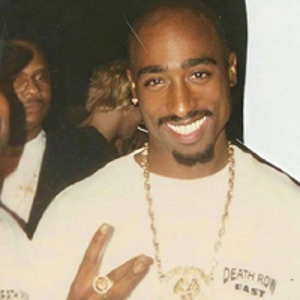

In [76]:
process_and_predict('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Pictures/photo_2021-06-16_08-34-04.jpg')

C:\Users\hm\AppData\Local\Temp\ipykernel_42792\1570052523.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((200,200), Image.ANTIALIAS)


1/1 [==============================] - 1s 757ms/step
Age: 21 
 Gender: male


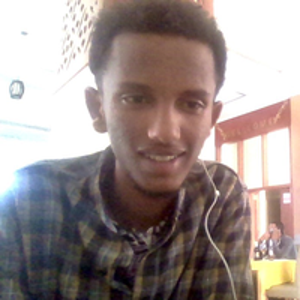

In [40]:
process_and_predict('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Pictures/WIN_20220507_15_49_55_Pro.jpg')

C:\Users\hm\AppData\Local\Temp\ipykernel_14224\1570052523.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((200,200), Image.ANTIALIAS)


1/1 [==============================] - 0s 414ms/step
Age: 28 
 Gender: male


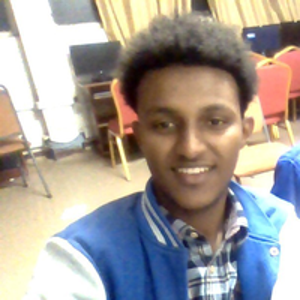

In [75]:
process_and_predict('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Pictures/WIN_20220419_21_58_25_Pro.jpg')

C:\Users\hm\AppData\Local\Temp\ipykernel_14224\1570052523.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((200,200), Image.ANTIALIAS)


1/1 [==============================] - 0s 195ms/step
Age: 26 
 Gender: male


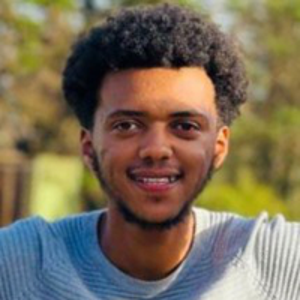

In [78]:
process_and_predict('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Pictures/photo_2022-05-31_21-48-18.jpg')

In [6]:
from keras.models import load_model
from time import sleep
from tensorflow.keras.utils import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np
from keras.models import load_model
#Test the model
agemodel = load_model('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/age_model_10epochs.h5', compile=False)
genmodel = load_model('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/gender_model_5epochs.h5', compile=False)
#face_classifier=cv2.CascadeClassifier('haarcascades_models/haarcascade_frontalface_default.xml')
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gender_labels = ['Male', 'Female']
cap=cv2.VideoCapture(0)

while True:
    ret,frame=cap.read()
    labels=[]
    
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        #Get image ready for prediction
        roi=roi_gray.astype('float')/255.0  #Scale
        roi=img_to_array(roi)
        roi=np.expand_dims(roi,axis=0)  #Expand dims to get it ready for prediction (1, 48, 48, 1)

     
        
        #Gender
        roi_color=frame[y:y+h,x:x+w]
        roi_color=cv2.resize(roi_color,(200,200),interpolation=cv2.INTER_AREA)
        gender_predict = genmodel.predict(np.array(roi_color).reshape(-1,200,200,3))
        gender_predict = (gender_predict>= 0.5).astype(int)[:,0]
        gender_label=gender_labels[gender_predict[0]] 
        gender_label_position=(x,y+h+50) #50 pixels below to move the label outside the face
        cv2.putText(frame,gender_label,gender_label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        
        #Age
        age_predict = agemodel.predict(np.array(roi_color).reshape(-1,200,200,3))
        age = round(age_predict[0,0])
        age_label_position=(x+h,y+h)
        cv2.putText(frame,"Age="+str(age),age_label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        
   
    cv2.imshow('Age and Gender detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 56ms/step


In [66]:

#We Added interface by using tkinter library
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
import numpy as np
#load the trained model to classify sign
from keras.models import load_model
agemodel = load_model('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/age_model_5epochs.h5', compile=False)
genmodel = load_model('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/gender_model_11epochs.h5', compile=False)

#model = load_model('C:/Users/hm/Dropbox/My PC (LAPTOP-6M4OIP3C)/Desktop/PY/gender_model_11epochs.h5', compile=False)
gender_labels = ['Male', 'Female']

top=tk.Tk()
top.geometry('800x600')
top.title('Age and Gender Prediction')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
label1=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((200,200))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    print(image.shape)
    
    age = agemodel.predict(image)
    #print(age)
    age=int(age)
    print("Age: ",age)
    label1.configure(foreground='#011638', text=age) 
    label1.place(relx=0.40,rely=0.13)
    gender = np.round(genmodel.predict(image))
    if gender == 0:
        gender = 'male'
    elif gender == 1:
        gender = 'female'
    print("Gender: ",gender)
    label.configure(foreground='#011638', text=gender) 
    label.place(relx=0.40,rely=0.18)

def show_classify_button(file_path):
    classify_b=Button(top,text="Predict age and Gender",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.40,rely=0.75)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        
        sign_image.configure(image=im)
        sign_image.image=im
        label1.configure(text='')
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=100,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label1.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Age and Gender Prediction",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

(1, 200, 200, 3)
1/1 [==============================] - 3s 3s/step
Age:  18.065714
1/1 [==============================] - 3s 3s/step
Gender:  female
